Ranking materials by density in chemical system: Ti-O


Retrieving SummaryDoc documents:   0%|          | 0/124 [00:00<?, ?it/s]


Lightest Materials:
    formula   density
42    Ti3O7  1.400273
114    TiO2  1.401054
113    TiO2  1.401380
43    Ti3O7  1.680811
112    TiO2  1.931695

Heaviest Materials:
   formula   density
45   Ti4O3  5.313966
64   Ti9O8  5.315400
72     TiO  5.375279
75     TiO  5.409795
76     TiO  5.491461


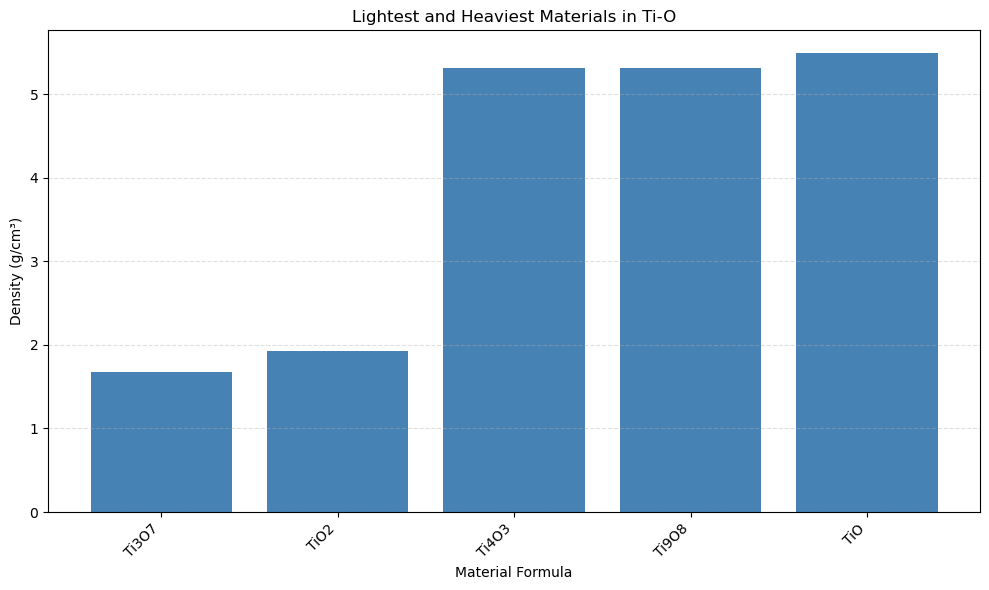

In [2]:
import os #import all necessary packages
import pandas as pd
import matplotlib.pyplot as plt
from mp_api.client import MPRester
import warnings
warnings.filterwarnings('ignore')

#Input Materials Project API key
API_KEY = "vY4eQRy8RVhz0KWArWojEAkcMRoc8pfU"  #replace with your own API key

def rank_materials_by_density(chemsys="Ti-O"):
    print(f"Ranking materials by density in chemical system: {chemsys}")
    
    with MPRester(API_KEY) as mpr: #connect to Materials Project database using personal API key
        #query materials from selected chemical system, extract relevant data
        docs = mpr.materials.summary.search(
            chemsys=chemsys,
            fields=[
                "material_id", 
                "formula_pretty", #chemical formula
                "density" #material density
            ]
        )

        #extract data
        data = [{
            "material_id": doc.material_id, #sort property to correct label
            "formula": doc.formula_pretty,
            "density": doc.density
        } for doc in docs if doc.density is not None]

        #create pandas DataFrame
        df = pd.DataFrame(data)

        if df.empty: #if no data found, print:
            print("No materials found with density data.")
            return

        #sort data by density value
        df_sorted = df.sort_values(by="density")
        
        #show the top 5 lightest and heaviest materials using head and tail functions
        lightest = df_sorted.head(5)
        heaviest = df_sorted.tail(5)

        print("\nLightest Materials:") #print lightest data
        print(lightest[["formula", "density"]])

        print("\nHeaviest Materials:") #print heaviest data
        print(heaviest[["formula", "density"]])

        #combine data for plotting
        plot_df = pd.concat([lightest, heaviest])
        
        #bar chart
        plt.figure(figsize=(10, 6)) #size 
        bars = plt.bar(plot_df["formula"], plot_df["density"], color="steelblue")
        plt.xlabel("Material Formula") #labels
        plt.ylabel("Density (g/cm³)")
        plt.title(f"Lightest and Heaviest Materials in {chemsys}")
        plt.xticks(rotation=45, ha="right")
        plt.tight_layout()
        plt.grid(True, axis='y', linestyle='--', alpha=0.4)
        plt.savefig(f"density_rank_{chemsys.replace('-', '_')}.png")
        plt.show()

        return df_sorted

def main():
    #choose chemical system
    chemical_system = "Ti-O" #chemical system can be changed here
    rank_materials_by_density(chemical_system)

if __name__ == "__main__":
    main()
